In [1]:
#Implement L2 regularization on cat-dog classification neural network. Train the model on the
#dataset, and observe the impact of the regularization on the weight parameters. (Do not use
#data augmentation).
#a. L2 regularization using optimizer’s weight decay
#b. L2 regularization using loop to find L2 norm of weights

In [4]:
#without normalization
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset,DataLoader

class neural_net(nn.Module): 
    def __init__(self):
        super(neural_net, self).__init__()
        self.model = nn.Sequential(nn.Linear(3*100*100, 6000, bias = True),
                             nn.ReLU(),
                             nn.Linear(6000, 1200, bias = True),
                             nn.ReLU(),
                             nn.Linear(1200, 100, bias = True),
                             nn.ReLU(),
                             nn.Linear(100, 1, bias = True), 
                             nn.Sigmoid())
    def forward(self,x):
        x = x.view(-1, 30000)
        return self.model(x)

losses = []
directory = 'cats_and_dogs_filtered/train/'
transform = transforms.Compose([transforms.Resize((100,100)),transforms.ToTensor()])
dataset = ImageFolder(directory, transform=transform)
#img, label = dataset[0]
#print(img.shape, label)
batch_size = 32
train_loader = DataLoader(dataset, batch_size, shuffle=True)
loss_fn = nn.BCELoss()
model = neural_net()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
for epoch in range(6):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        labels = labels.float()
        #print(inputs.size())
        #print(labels.size())
        optimizer.zero_grad()
        outputs = model(inputs)
        #print(outputs)
        loss = loss_fn(outputs.flatten(), labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if(i%30 == 0):
            print('[%d, %d] loss: %.3f' %(epoch + 1, i, loss.item()))


[1, 0] loss: 0.704
[1, 30] loss: 0.699
[1, 60] loss: 0.689
[2, 0] loss: 0.696
[2, 30] loss: 0.686
[2, 60] loss: 0.693
[3, 0] loss: 0.693
[3, 30] loss: 0.637
[3, 60] loss: 0.689
[4, 0] loss: 0.662
[4, 30] loss: 0.712
[4, 60] loss: 0.639
[5, 0] loss: 0.698
[5, 30] loss: 0.733
[5, 60] loss: 0.686
[6, 0] loss: 0.675
[6, 30] loss: 0.682
[6, 60] loss: 0.671


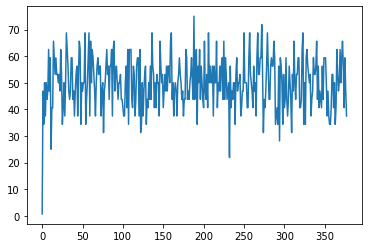

In [3]:
#loss plot without normalization
import matplotlib.pyplot as plt 

plt.plot([i for i in range(0, len(losses))], losses)
plt.show()

In [44]:
#with normalization
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset,DataLoader

class neural_net(nn.Module): 
    def __init__(self):
        super(neural_net, self).__init__()
        self.model = nn.Sequential(nn.Linear(3*100*100, 6000, bias = True),
                             nn.ReLU(),
                             nn.Linear(6000, 1200, bias = True),
                             nn.ReLU(),
                             nn.Linear(1200, 100, bias = True),
                             nn.ReLU(),
                             nn.Linear(100, 1, bias = True), 
                             nn.ReLU())
    def forward(self,x):
        x = x.view(-1, 30000)
        return self.model(x)

losses = []
directory = 'cats_and_dogs_filtered/train/'
transform = transforms.Compose([transforms.Resize((100,100)),transforms.ToTensor()])
dataset = ImageFolder(directory, transform=transform)
#img, label = dataset[0]
#print(img.shape, label)
batch_size = 32
train_loader = DataLoader(dataset, batch_size, shuffle=True)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.1)
model = neural_net()

for epoch in range(6):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        labels = labels.float()
        #print(inputs.size())
        #print(labels.size())
        optimizer.zero_grad()
        outputs = model(inputs)
        #print(outputs.size())
        loss = loss_fn(outputs.flatten(), labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if(i%30 == 0):
            print('[%d, %d] loss: %.3f' %(epoch + 1, i, loss.item()))

[1, 0] loss: 53.125
[1, 10] loss: 46.875
[1, 20] loss: 46.875
[1, 30] loss: 53.125
[1, 40] loss: 43.750
[1, 50] loss: 50.000
[1, 60] loss: 56.250
[2, 0] loss: 46.875
[2, 10] loss: 43.750
[2, 20] loss: 46.875
[2, 30] loss: 59.375
[2, 40] loss: 40.625
[2, 50] loss: 62.500
[2, 60] loss: 75.000
[3, 0] loss: 46.875
[3, 10] loss: 43.750
[3, 20] loss: 50.000
[3, 30] loss: 40.625
[3, 40] loss: 40.625
[3, 50] loss: 40.625
[3, 60] loss: 53.125
[4, 0] loss: 43.750
[4, 10] loss: 37.500
[4, 20] loss: 43.750
[4, 30] loss: 37.500
[4, 40] loss: 62.500
[4, 50] loss: 68.750
[4, 60] loss: 62.500
[5, 0] loss: 46.875
[5, 10] loss: 34.375
[5, 20] loss: 56.250
[5, 30] loss: 56.250
[5, 40] loss: 43.750
[5, 50] loss: 56.250
[5, 60] loss: 43.750
[6, 0] loss: 56.250
[6, 10] loss: 34.375
[6, 20] loss: 56.250
[6, 30] loss: 50.000
[6, 40] loss: 46.875
[6, 50] loss: 46.875
[6, 60] loss: 53.125


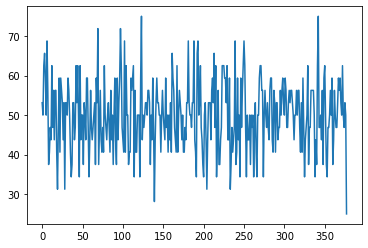

In [45]:
#loss plot with normalization
import matplotlib.pyplot as plt 

plt.plot([i for i in range(0, len(losses))], losses)
plt.show()

In [ ]:
#loop implmenetation 
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset,DataLoader

class neural_net(nn.Module): 
    def __init__(self):
        super(neural_net, self).__init__()
        self.model = nn.Sequential(nn.Linear(3*100*100, 6000, bias = True),
                             nn.ReLU(),
                             nn.Linear(6000, 1200, bias = True),
                             nn.ReLU(),
                             nn.Linear(1200, 100, bias = True),
                             nn.ReLU(),
                             nn.Linear(100, 1, bias = True), 
                             nn.ReLU())
    def forward(self,x):
        x = x.view(-1, 30000)
        return self.model(x)

losses = []
directory = 'cats_and_dogs_filtered/train/'
transform = transforms.Compose([transforms.Resize((100,100)),transforms.ToTensor()])
dataset = ImageFolder(directory, transform=transform)
#img, label = dataset[0]
#print(img.shape, label)
batch_size = 32
train_loader = DataLoader(dataset, batch_size, shuffle=True)
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,  weight_decay=0.1)
model = neural_net()
for epoch in range(6):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        labels = labels.float()
        #print(inputs.size())
        #print(labels.size())
        optimizer.zero_grad()
        outputs = model(inputs)
        #print(outputs.size())
        loss = loss_fn(outputs.flatten(), labels)
        l2_la,bda = 0.001
        l2_norm = sum(p.pow(2).sum() for p in model.parameters())
        loss = loss + l2_norm*l2_lambda 
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if(i%10 == 0):
            print('[%d, %d] loss: %.3f' %(epoch + 1, i, loss.item()))